In [1]:
from automata.fa.dfa import DFA
from visual_automata.fa.dfa import VisualDFA

In [2]:
def equivalent(dfa1, dfa2):
    def get_next_state(current_state, symbol, transitions):
        return transitions.get(current_state, {}).get(symbol)

    def are_states_equivalent(state1, state2):
        return equivalent_table[state1][state2]

    # Initialize equivalence table
    equivalent_table = {}
    for state1 in dfa1.states:
        equivalent_table[state1] = {}
        for state2 in dfa2.states:
            equivalent_table[state1][state2] = (state1 in dfa1.final_states) == (state2 in dfa2.final_states)

    # Check if any initial pair is not equivalent
    if not equivalent_table[dfa1.initial_state][dfa2.initial_state]:
        return False

    # Check for unreachable states and mark them as non-equivalent
    for state1 in dfa1.states:
        for state2 in dfa2.states:
            for symbol in dfa1.input_symbols:
                next_state1 = get_next_state(state1, symbol, dfa1.transitions)
                next_state2 = get_next_state(state2, symbol, dfa2.transitions)
                if (next_state1 is None and next_state2 is not None) or (next_state1 is not None and next_state2 is None):
                    equivalent_table[state1][state2] = False

    # Iteratively refine equivalence table
    while True:
        changed = False
        for state1 in dfa1.states:
            for state2 in dfa2.states:
                if not equivalent_table[state1][state2]:
                    continue
                for symbol in dfa1.input_symbols:
                    next_state1 = get_next_state(state1, symbol, dfa1.transitions)
                    next_state2 = get_next_state(state2, symbol, dfa2.transitions)
                    if not are_states_equivalent(next_state1, next_state2):
                        equivalent_table[state1][state2] = False
                        changed = True
                        break
            if changed:
                break
        if not changed:
            break

    # Check if all states are equivalent
    for state1 in dfa1.states:
        for state2 in dfa2.states:
            if are_states_equivalent(state1, state2):
                for symbol in dfa1.input_symbols:
                    next_state1 = get_next_state(state1, symbol, dfa1.transitions)
                    next_state2 = get_next_state(state2, symbol, dfa2.transitions)
                    if not are_states_equivalent(next_state1, next_state2):
                        return False
            else:
                if state1 in dfa1.final_states != state2 in dfa2.final_states:
                    return False

    return True

# MAIN
dfa1_list = []
dfa1_temp = input("Masukkan State DFA 1 (pisah dengan spasi): ").split() 
dfa1_list.extend(dfa1_temp)
print(dfa1_list)

while True:
    initial_state1 = input("Initial state: ")
    if initial_state1 in dfa1_list :
        print("Initial state adalah " + str(initial_state1) + "\n")
        final_state1 = input("Final state (pisah dengan spasi bila > 1): ").split()
        if all(state in dfa1_list for state in final_state1):
            print("Final state adalah " + str(final_state1) + "\n")
            break;
        else:
            print("Final state tidak sesuai")
            continue
    else:
        print("Initial state tidak sesuai")
        continue

input_symbol1 = input("Masukkan simbol input untuk DFA 1 (pisah dengan spasi): ").split()
transitions_dfa1 = {}
for state in dfa1_list:
    transitions_dfa1[state] = {}
    for symbol in input_symbol1:
        next_state = input(f"Transisi dari state {state} dengan simbol {symbol}: ")
        transitions_dfa1[state][symbol] = next_state

print("\nState pada DFA 1: ")
for x in dfa1_list :
    if x in final_state1 and x == initial_state1:
        print("->*" + x)
    elif x in final_state1:
        print(" *" + x)
    elif x == initial_state1:
        print("->" + x)
    else :
        print("  " + x)
print("\n")

dfa2_list = []
dfa2_temp = input("Masukkan State DFA 2 (pisah dengan spasi): ").split() 
dfa2_list.extend(dfa2_temp)
print(dfa2_list)

while True:
    initial_state2 = input("Initial state: ")
    if initial_state2 in dfa2_list :
        print("Initial state adalah " + str(initial_state2) + "\n")
        final_state2 = input("Final state (pisah dengan spasi bila > 1): ").split()
        if all(state in dfa2_list for state in final_state2):
            print("Final state adalah " + str(final_state2) + "\n")
            break;
        else:
            print("Final state tidak sesuai")
            continue
    else:
        print("Initial state tidak sesuai")
        continue

input_symbol2 = input("Masukkan simbol input untuk DFA 2 (pisah dengan spasi): ").split()
transitions_dfa2 = {}
for state in dfa2_list:
    transitions_dfa2[state] = {}
    for symbol in input_symbol2:
        next_state = input(f"Transisi dari state {state} dengan simbol {symbol}: ")
        transitions_dfa2[state][symbol] = next_state

print("\nState pada DFA 2: ")
for x in dfa2_list :
    if x in final_state2 and x == initial_state2:
        print("->*" + x)
    elif x in final_state2:
        print(" *" + x)
    elif x == initial_state2:
        print("->" + x)
    else :
        print("  " + x)
print("\n")

# Example usage
dfa1 = VisualDFA(
    states = set(dfa1_list),
    input_symbols = set(input_symbol1),
    transitions = transitions_dfa1,
    initial_state = initial_state1,
    final_states = set(final_state1)
)

dfa2 = VisualDFA(
    states=set(dfa2_list),
    input_symbols = set(input_symbol2),
    transitions = transitions_dfa2,
    initial_state = initial_state2,
    final_states = set(final_state2)
)

KeyboardInterrupt: Interrupted by user

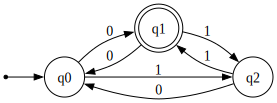

In [ ]:
dfa1.show_diagram()

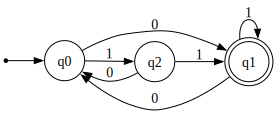

In [ ]:
dfa2.show_diagram()

In [ ]:
if(equivalent(dfa1, dfa2)):
    print("Kedua DFA Ekuivalen")
else:
    print("Kedua DFA Tidak Ekuivalen")

Kedua DFA Tidak Ekuivalen
